# Classification modeling approach 2 


In [37]:
import pandas as pd
import os
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

os.chdir("P:\Courses\MMA 823 - Financial Markets\Project")

In [2]:
df1=pd.read_csv("2014_Financial_Data.csv")
df2=pd.read_csv("2015_Financial_Data.csv")
df3=pd.read_csv("2016_Financial_Data.csv")
df4=pd.read_csv("2017_Financial_Data.csv")
df5=pd.read_csv("2018_Financial_Data.csv")

In [3]:
df1['Year']=2014
df2['Year']=2015
df3['Year']=2016
df4['Year']=2017
df5['Year']=2018

In [4]:
df1.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 226 entries, Unnamed: 0 to Year
dtypes: float64(222), int64(2), object(2)
memory usage: 6.6+ MB


In [6]:
### Drop the Stock Column
df1 = df1.drop(df1.columns[0], axis = 1)
df2 = df2.drop(df2.columns[0], axis = 1)
df3 = df3.drop(df3.columns[0], axis = 1)
df4 = df4.drop(df4.columns[0], axis = 1)
df5 = df5.drop(df5.columns[0], axis = 1)

In [7]:
### Convert Sector to Numeric
#df1 = pd.get_dummies(df1,columns=['Sector'],dtype= 'int64')
#df2 = pd.get_dummies(df2,columns=['Sector'],dtype= 'int64')
#df3 = pd.get_dummies(df3,columns=['Sector'],dtype= 'int64')
#df4 = pd.get_dummies(df4,columns=['Sector'],dtype= 'int64')
#df5 = pd.get_dummies(df5,columns=['Sector'],dtype= 'int64')

In [7]:
### Change Data Type
df1['Class'] = df1['Class'].astype(object)
df2['Class'] = df2['Class'].astype(object)
df3['Class'] = df3['Class'].astype(object)
df4['Class'] = df4['Class'].astype(object)
df5['Class'] = df5['Class'].astype(object)

In [8]:
df1.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df2.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df3.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df4.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df5.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR"},inplace=True)


In [9]:
df1.drop(['Sector'], axis=1, inplace=True)
df2.drop(['Sector'], axis=1, inplace=True)
df3.drop(['Sector'], axis=1, inplace=True)
df4.drop(['Sector'], axis=1, inplace=True)
df5.drop(['Sector'], axis=1, inplace=True)

In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20, weights='distance', metric='nan_euclidean', copy=True)

In [11]:
df1_clean = imputer.fit_transform(df1)
df1_clean = pd.DataFrame(df1_clean)
df1_clean.columns = list(df1)

In [12]:
df2_clean = imputer.fit_transform(df2)
df2_clean = pd.DataFrame(df2_clean)
df2_clean.columns = list(df2)


In [13]:
df3_clean = imputer.fit_transform(df3)
df3_clean = pd.DataFrame(df3_clean)
df3_clean.columns = list(df3)

In [14]:
df4_clean = imputer.fit_transform(df4)
df4_clean = pd.DataFrame(df4_clean)
df4_clean.columns = list(df4)

In [15]:
df5_clean = imputer.fit_transform(df5)
df5_clean = pd.DataFrame(df5_clean)
df5_clean.columns = list(df5)

In [16]:

##### Check Missing Value Again
df1_clean.isnull().sum()
df2_clean.isnull().sum()
df3_clean.isnull().sum()
df4_clean.isnull().sum()
df5_clean.isnull().sum()

Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
R&D Expenses            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
PRICE_VAR               0
Class                   0
Year                    0
Length: 224, dtype: int64

Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
R&D Expenses            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
PRICE_VAR               0
Class                   0
Year                    0
Length: 224, dtype: int64

Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
R&D Expenses            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
PRICE_VAR               0
Class                   0
Year                    0
Length: 224, dtype: int64

Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
R&D Expenses            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
PRICE_VAR               0
Class                   0
Year                    0
Length: 224, dtype: int64

Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
R&D Expenses            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
PRICE_VAR               0
Class                   0
Year                    0
Length: 224, dtype: int64

In [17]:
###### Concatenate
data = pd.concat([df1_clean, df2_clean, df3_clean, df4_clean, df5_clean])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 4391
Columns: 224 entries, Revenue to Year
dtypes: float64(224)
memory usage: 37.9 MB


In [19]:
data.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Class,Year
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.018700,-0.021700,0.035900,0.031600,0.122800,0.0000,-0.1746,-9.323276,0.0,2014.0
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0.090157,0.088497,0.101764,-0.031982,0.290933,1.6484,1.7313,-25.512193,0.0,2014.0
2,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.061800,0.098100,0.188600,0.326800,0.273800,0.0000,0.0234,33.118297,1.0,2014.0
3,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.021100,-0.051000,-0.018900,0.196300,-0.045800,0.0000,-0.0060,2.752291,1.0,2014.0
4,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.025700,0.009000,0.021500,0.027400,0.102500,0.0000,-0.0220,12.897715,1.0,2014.0


In [20]:
# Data missing information 
data_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Class,Year
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.dtypes

Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
R&D Expenses            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
PRICE_VAR               float64
Class                   float64
Year                    float64
Length: 224, dtype: object

In [22]:
# Train Year: 2014 - 2016
# Test Year:  2017 - 2018
all_year = set(data['Year'].unique())
test_year = set(range(2017,2018,1))
train_year = all_year - test_year

len(train_year), len(test_year), len(all_year)

train = data[data['Year'].isin(train_year)]
test = data[data['Year'].isin(test_year)]

train['Class'].value_counts()

class_ratio = len(train[train['Class']==1]) / len(train.index)
class_ratio

len(test) / len(data)
len(train) / len(data)

(4, 1, 5)

1.0    10789
0.0     6328
Name: Class, dtype: int64

0.6303090494829702

0.224668206730987

0.775331793269013

In [23]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data1, data1['Class'], test_size=0.3, random_state=42)
data.drop(['Year','PRICE_VAR'], axis=1, inplace=True)
train.drop(['Year','PRICE_VAR'], axis=1, inplace=True)
test.drop(['Year','PRICE_VAR'], axis=1, inplace=True)

C:\Users\PRIYA\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
test2=test.copy()

In [25]:
test2.drop('Class', axis=1,inplace=True)

In [26]:
test.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '5Y Dividend per Share Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Class'],
      dtype='object', length=222)

In [27]:
test2.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '10Y Dividend per Share Growth (per Share)',
       '5Y Dividend per Share Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth'],
      dtype='object', length=221)

In [28]:
data.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '5Y Dividend per Share Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Class'],
      dtype='object', length=222)

In [29]:
data['Class']= data['Class'].astype('int64')
train['Class']= train['Class'].astype('int64')
test['Class']= test['Class'].astype('int64')

C:\Users\PRIYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PRIYA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:

from pycaret.classification import *
classification_setup = setup(data= train, target='Class',remove_outliers=True,normalize=True, remove_multicollinearity=True ,normalize_method='robust',
                            feature_selection=True ,silent = True,session_id = 6563)

Setup Succesfully Completed!


,Description,Value
0,session_id,6563
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(17117, 222)"
4,Missing Values,False
5,Numeric Features,221
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [39]:
compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.6977,0.7503,0.8322,0.7269,0.7760,0.3176,0.3247,73.8444
1,Light Gradient Boosting Machine,0.6967,0.7432,0.8290,0.7272,0.7747,0.3165,0.3232,5.8673
2,Gradient Boosting Classifier,0.6975,0.7392,0.8416,0.7230,0.7777,0.3124,0.3217,84.3652
3,Extra Trees Classifier,0.6939,0.7377,0.8459,0.7180,0.7766,0.3006,0.3112,3.4145
4,Extreme Gradient Boosting,0.6807,0.7230,0.8046,0.7207,0.7602,0.2866,0.2908,20.5740
5,Ada Boost Classifier,0.6703,0.7024,0.8256,0.7026,0.7591,0.2473,0.2557,17.5200
6,Random Forest Classifier,0.6519,0.6901,0.7237,0.7233,0.7235,0.2538,0.2539,0.8556
7,Linear Discriminant Analysis,0.6562,0.6663,0.8804,0.6735,0.7631,0.1748,0.1976,0.5372
8,Quadratic Discriminant Analysis,0.4450,0.6220,0.1749,0.7547,0.2837,0.0618,0.1072,0.2118
9,Decision Tree Classifier,0.6153,0.5910,0.6850,0.6981,0.6913,0.1808,0.1811,4.5290


In [40]:
cb_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7231,0.7794,0.8419,0.7489,0.7927,0.3802,0.3861
1,0.6866,0.7241,0.8403,0.7127,0.7713,0.2842,0.2941
2,0.6998,0.7542,0.8403,0.7256,0.7788,0.3196,0.3280
3,0.6663,0.7233,0.7871,0.7124,0.7479,0.2582,0.2611
4,0.6937,0.7584,0.8306,0.7233,0.7733,0.3083,0.3153
5,0.7008,0.7689,0.8306,0.7305,0.7774,0.3271,0.3334
6,0.6988,0.7430,0.8341,0.7275,0.7772,0.3190,0.3262
7,0.7028,0.7608,0.8374,0.7303,0.7802,0.3282,0.3356
8,0.6856,0.7322,0.8309,0.7157,0.7690,0.2854,0.2933
9,0.7191,0.7590,0.8486,0.7423,0.7919,0.3656,0.3735


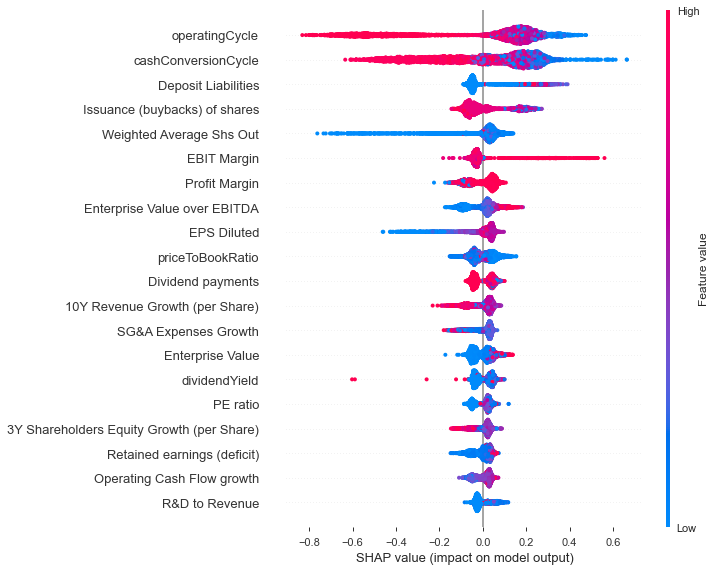

In [42]:
interpret_model(cb_model)

In [44]:
pred_cb = predict_model(cb_model, data=test2)

In [45]:
best=automl(use_holdout=True)

In [46]:
best

In [48]:
cb_model

In [50]:
lgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7211,0.7746,0.8355,0.7496,0.7902,0.3778,0.3828
1,0.6765,0.7071,0.8210,0.7099,0.7614,0.2672,0.2741
2,0.7028,0.7569,0.8452,0.7268,0.7815,0.3253,0.3345
3,0.6755,0.7248,0.7839,0.7232,0.7523,0.2839,0.2859
4,0.6876,0.7511,0.8339,0.7161,0.7705,0.2903,0.2987
5,0.6957,0.7521,0.8161,0.7312,0.7713,0.3209,0.3252
6,0.7069,0.7437,0.8454,0.7312,0.7842,0.3350,0.3437
7,0.7018,0.7472,0.8438,0.7268,0.7809,0.3223,0.3312
8,0.6937,0.7252,0.8277,0.7250,0.7729,0.3088,0.3153
9,0.7049,0.7488,0.8374,0.7324,0.7814,0.3336,0.3407


In [52]:
evaluate_model(lgbm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Neural Networks 

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
X_train=train.drop('Class', axis=1)

In [32]:
Y_train=train['Class']

In [45]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=150,activation='logistic', solver='lbfgs',alpha=0.2, learning_rate='adaptive',max_iter=300).fit(X_train, Y_train)

In [46]:
pred=clf.predict(test2)

In [47]:
confusion_matrix(pred, test['Class'])

array([[ 569,  207],
       [3021, 1163]], dtype=int64)

In [48]:
from sklearn.metrics import roc_auc_score, classification_report
roc_auc_score(test['Class'], pred)

0.5037004656080353

In [49]:
print(classification_report(pred,test['Class']))

              precision    recall  f1-score   support

           0       0.16      0.73      0.26       776
           1       0.85      0.28      0.42      4184

    accuracy                           0.35      4960
   macro avg       0.50      0.51      0.34      4960
weighted avg       0.74      0.35      0.39      4960

